In [68]:
import json
import pandas as pd

data = []

with open('data/train_mini.jsonl') as f:
    for line in f:
        data.append(json.loads(line))

df = pd.DataFrame(data)
df 

,0,1,2,3,4,text,label,label_text
0,0.179336,0.198772,0.189519,0.201993,0.230381,"a stirring , funny and finally transporting re...",4,very positive
1,0.168065,0.255541,0.191857,0.218101,0.166436,apparently reassembled from the cutting-room f...,1,negative
2,0.193525,0.220765,0.194517,0.204151,0.187041,they presume their audience wo n't sit still f...,1,negative
3,0.168721,0.216207,0.255953,0.200023,0.159097,the entire movie is filled with deja vu moments .,2,neutral
4,0.176373,0.224937,0.196047,0.229963,0.172679,this is a visually stunning rumination on love...,3,positive
...,...,...,...,...,...,...,...,...
849,0.204654,0.205277,0.197433,0.199287,0.193350,if we 're to slap protagonist genevieve leplou...,0,very negative
850,0.191216,0.218150,0.199204,0.206696,0.184734,"i 've had more interesting -- and , dare i say...",1,negative
851,0.179115,0.237323,0.196309,0.215429,0.171824,"i 've seen some bad singer-turned actors , but...",1,negative
852,0.184459,0.215606,0.195733,0.217475,0.186726,`` nicholas nickleby '' is a perfect family fi...,3,positive


In [69]:
def find_largest_column(row):
    # Get the column names of the largest values
    largest_column = row.idxmax()
    return largest_column

df['teacher_label'] = df[["0", "1", "2", "3", "4"]].apply(find_largest_column, axis=1)
df['label'] = df['label'].apply(str)

df

,0,1,2,3,4,text,label,label_text,teacher_label
0,0.179336,0.198772,0.189519,0.201993,0.230381,"a stirring , funny and finally transporting re...",4,very positive,4
1,0.168065,0.255541,0.191857,0.218101,0.166436,apparently reassembled from the cutting-room f...,1,negative,1
2,0.193525,0.220765,0.194517,0.204151,0.187041,they presume their audience wo n't sit still f...,1,negative,1
3,0.168721,0.216207,0.255953,0.200023,0.159097,the entire movie is filled with deja vu moments .,2,neutral,2
4,0.176373,0.224937,0.196047,0.229963,0.172679,this is a visually stunning rumination on love...,3,positive,3
...,...,...,...,...,...,...,...,...,...
849,0.204654,0.205277,0.197433,0.199287,0.193350,if we 're to slap protagonist genevieve leplou...,0,very negative,1
850,0.191216,0.218150,0.199204,0.206696,0.184734,"i 've had more interesting -- and , dare i say...",1,negative,1
851,0.179115,0.237323,0.196309,0.215429,0.171824,"i 've seen some bad singer-turned actors , but...",1,negative,1
852,0.184459,0.215606,0.195733,0.217475,0.186726,`` nicholas nickleby '' is a perfect family fi...,3,positive,3


# Distribution of Labels

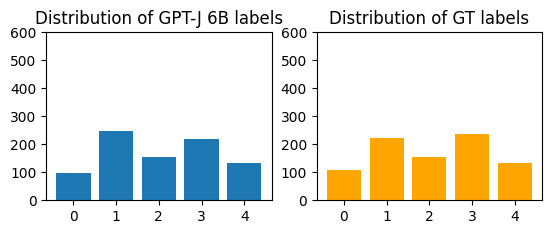

In [70]:
import matplotlib.pyplot as plt
import numpy as np

labels = ["0", "1", "2", "3", "4"]

def count_label(column_name):
    
    count = []

    for l in labels :
        num = len(df.loc[df[column_name] == l])
        count.append(num)

    return count

teacher_labels = count_label('teacher_label')
gt_labels = count_label('label')

plt.subplot(2,2,1)
plt.title('Distribution of GPT-J 6B labels')
plt.ylim(0, 600)
x = np.arange(5)
plt.bar(x, teacher_labels)
plt.xticks(x, labels)

plt.subplot(2,2,2)
plt.title('Distribution of GT labels')
plt.ylim(0, 600)
x = np.arange(5)
plt.bar(x, gt_labels, color = 'orange')
plt.xticks(x, labels)

plt.show()


## Comparing distribution of perplexity likelihoods for GPT-J soft labels

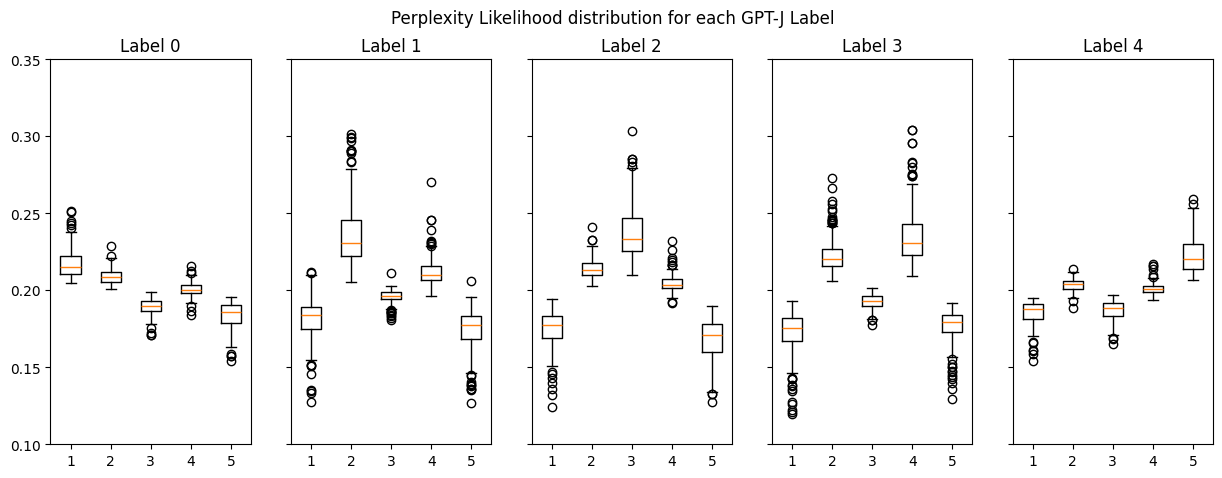

In [71]:
# Dict for rows corresponding to certain teacher_label 
classes = {}

for l in labels:
    classes[l] = df.loc[df['teacher_label'] == l]

fig, axs = plt.subplots(1, 5, sharey = True, figsize = (15, 5))

fig.suptitle('Perplexity Likelihood distribution for each GPT-J Label')

for i in range (0, 5):
    l = labels[i]
    axs[i].boxplot([classes[l]["0"], classes[l]["1"], classes[l]["2"], classes[l]["3"], classes[l]["4"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.1, 0.35)
    num += 1

plt.show()


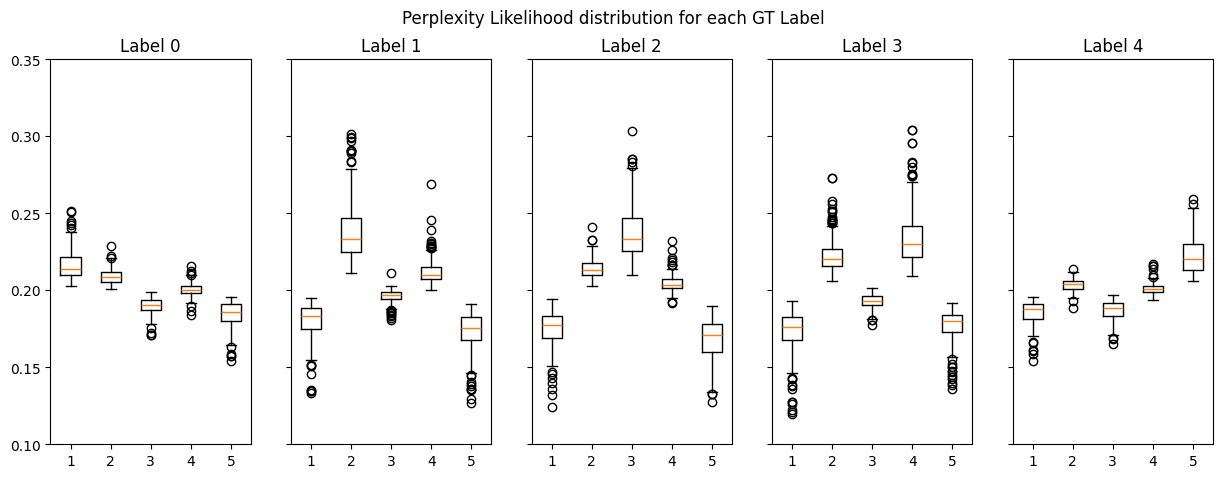

In [72]:
# Dict for rows corresponding to certain GT_label 
classes = {}

for l in labels:
    classes[l] = df.loc[df['label'] == l]

fig, axs = plt.subplots(1, 5, sharey = True, figsize = (15, 5))

fig.suptitle('Perplexity Likelihood distribution for each GT Label')

for i in range (0, 5):
    l = labels[i]
    axs[i].boxplot([classes[l]["0"], classes[l]["1"], classes[l]["2"], classes[l]["3"], classes[l]["4"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.1, 0.35)
    num += 1

plt.show()

In [73]:
l = len(df)
#right = len(df.loc[df['label'] == df['teacher_label']])
right = len(df.loc[df['teacher_label'] == df['label']])

print(right/l)

0.9660421545667447


# SST-2 Example

In [83]:
dfs = pd.read_csv('data/ickd_sst2_probs_n100.csv')
dfs

,index,sentence,label,negative_prob,positive_prob
0,0,hide new secretions from the parental units,0,0.999401,0.000599
1,1,"contains no wit , only labored gags",0,0.925769,0.074231
2,2,that loves its characters and communicates som...,1,0.141378,0.858622
3,3,remains utterly satisfied to remain the same t...,0,0.984465,0.015535
4,4,on the worst revenge-of-the-nerds clichés the ...,0,0.931876,0.068124
...,...,...,...,...,...
95,95,funny yet,1,0.500000,0.500000
96,96,overbearing and over-the-top,0,0.865811,0.134189
97,97,it 's robert duvall !,1,0.007118,0.992882
98,98,rich and sudden wisdom,1,0.015212,0.984788


In [76]:
dfs['teacher_label'] = dfs[["negative_prob", "positive_prob"]].apply(find_largest_column, axis=1)
dfs['label'] = dfs['label'].apply(str)

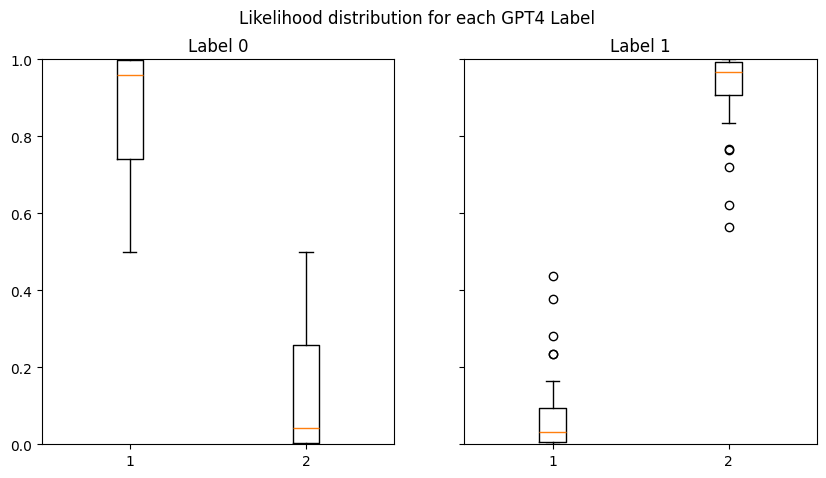

In [81]:
labels = ["negative_prob", "positive_prob"]

# Dict for rows corresponding to certain teacher_label 
classes = {}

for l in labels:
    classes[l] = dfs.loc[dfs['teacher_label'] == l]

fig, axs = plt.subplots(1, 2, sharey = True, figsize = (10, 5))

fig.suptitle('Likelihood distribution for each GPT4 Label')

for i in range (0, 2):
    l = labels[i]
    axs[i].boxplot([classes[l]["negative_prob"], classes[l]["positive_prob"]])

num = 0
for ax in axs:
    ax.set_title(f"Label {num}")
    ax.set_ylim(0.0, 1.0)
    num += 1

plt.show()


In [84]:
train_split = dfs[:80]
test_split = dfs[80:]

train_split.to_csv('data/sst2/train_sst2.csv')
test_split.to_csv('data/sst2/test_sst2.csv')